Introduction to Python: 2. Libraries and Plotting
============
***

## Importing Libraries
Python comes with some nifty functions, but most of the cool stuff happens in libraries, which are packaged collections of code written for specific purposes.

For example, every Python installation comes with a library called <code>random</code>, which is used to generate random numbers. To start using it, simply type <code>import random</code>. To reference a function in the <code>random</code> library, you simply type <code>random.FUNCTIONNAME</code>

I will be covering 2 main functions in the random library. <code>random.choice(arg)</code> takes as its argument a list, and returns a random element of that list. <code>random.random()</code> returns a number between 0 and 1.

If you run the following piece of code, you will get different results every time.

In [3]:
import random

print(random.choice(["Hi","Hello","Howdy","Ahoy"]))
print(random.random())

Hello
0.8756861424010707


In [1]:
from random import choice, random

print(choice(["Hi","Hello","Howdy","Ahoy"]))
print(random())

Hi
0.5279112284946278


There is a different way to import code. Instead of <code>import random</code>, you can type <code>from random import *</code> or <code>from random import choice, random</code>. This form of importing saves you the trouble of having to type <code>random.FUNCTIONNAME</code> every time - instead, you can reference the funtion directly. (This may cause problems if two libraries have functions of the same name. In general, use the former importing method especially when you're importing *, which imports all functions in the library)

In [2]:
from random import choice, random

print(choice(["Hi","Hello","Howdy","Ahoy"]))
print(random())

Hi
0.7666972569985959


Another library that you might find useful is the <code>math</code> library. This contains some useful functions such as abs, sin, cos and so on. It also has variables such as $e$ or $\pi$. Note that we will later be working with a library called NumPy that has superior implementations of all these functions.

In [3]:
import math
print(math.e)
print(math.pi)
print(math.cos(math.pi))

2.718281828459045
3.141592653589793
-1.0


## Plotting
Python has a library called <code>matplotlib</code> that allows us to makes all kinds of plots, including histograms, correlation plots, trend lines etc. 

I have a huge love-hate relationship with <code>matplotlib</code>. On one hand, it is pretty comprehensive, and has functions or specifications that cover most of everything I've wanted to do so far. On the other hand, working with it is really messy, working with times/dates can sometimes be downright terrible, and its documentation is sometimes awfully unhelpful. Most of <code>matplotlib</code> is best learnt through examples and lots of crying. That said, we make do with what we have, and for all its faults <code>matplotlib</code> is pretty useful.

We can plot some points like this:

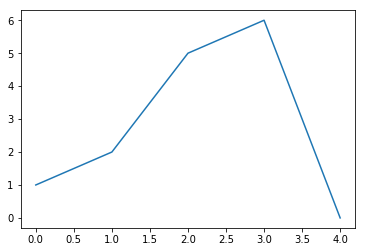

In [7]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot([1,2,5,6,0])
plt.show()

Like I've mentioned, <code>matplotlib</code> is best learnt by looking at the examples in the documentation, especially when you're dealing with formatting. Each matplotlib function also has LOTS of optional arguments, so you can get the exact graph you want. Here, I'll just cover some of the functions you'll more commonly use.

<code>plot</code> in its simplest form takes a single list as an argument and plots a line like above. If you supply 2 lists, it will takes the first as the list of X-coordinates, and the second as the list of Y-coordinates. You can also plot multiple plots in a single graph. Use <code>clf()</code> to clear a plot. (You won't need that in these notebooks, but you will in code.)

Other optional arguments include "label" (to be used in the legend) and "color".

The following example showcases some basic features of a standard plot, with other formatting code.

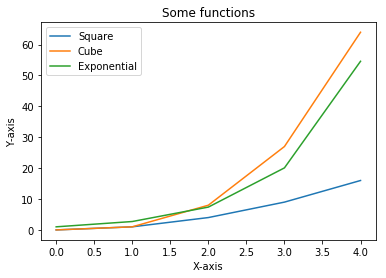

In [13]:
import math
import matplotlib.pyplot as plt

nums = range(5)

line1 = plt.plot([i*i for i in nums], label="Square")
line2 = plt.plot([i**3 for i in nums], label="Cube")
line3 = plt.plot([math.e**i for i in nums], label="Exponential")

# Formatting
plt.legend()
plt.title("Some functions") 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()

Histograms are useful showing data in buckets. The <code>hist</code> function takes as its first and compulsory argument a list of values you want to classify. E.g.:

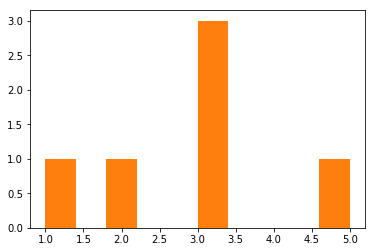

In [15]:
import matplotlib.pyplot as plt
my_hist = plt.hist([1,2,3,3,3,5])
plt.show()

<code>hist</code> has a rather important optional argument <code>bins</code>. <code>bins</code> can be either a number (the number of buckets) or a list of numbers (the edges of each bucket). Provide the <code>bins</code> argument to modify how you want your histogram to look.

For example, let's generate 1000 numbers from 0 to 10 and group them into 3 arbitrary buckets, and group them by some arbitrary divisions:

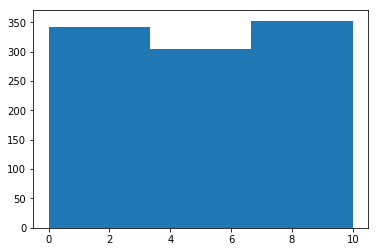

In [19]:
import random
data = [round(random.random()*10) for i in range(1000)]
plt.hist(data,bins=3)
plt.show()

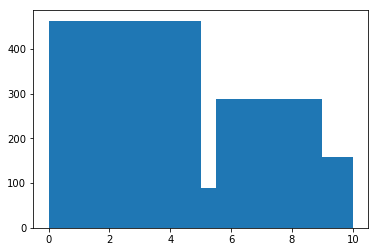

In [20]:
import random
data = [round(random.random()*10) for i in range(1000)]
plt.hist(data,bins=[0,5,5.5,9,10])
plt.show()

## Exercises

1. <b><u>Brownian Motion</u></b>: Make a list of 1000 numbers. Let the first number be 0. Each subsequent point is +1, -1 or equal to the previous. Plot the result.
2. <b><u>Central Limit Theorem</u></b>: The Central Limit Theorem states that the sampling mean of any random variable approaches a normal distribution as the number of samples increases. In other words, suppose you general a random sample of size M. That sample has a mean $\bar{x}$. If take many such samples (say, N samples), the distribution of $\bar{x}$ will approach a normal distribution. 
Let's test the central limit theorem: write a function that takes arguments M and N, and generate N samples of M observations as above, and plot a histogram of the means. Observations can be generated from <code>random.random()</code> or using <code>random.choice</code>.

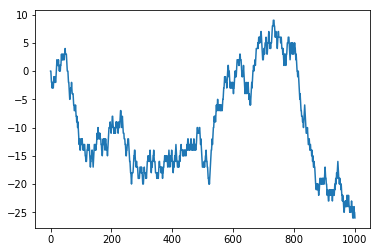

In [26]:
# Exercise 1 Solution

import random
import matplotlib.pyplot as plt
ls = [0]
for i in range(1000):
    ls.append(ls[-1]+random.choice((-1,0,1)))
plt.plot(ls)
plt.show()

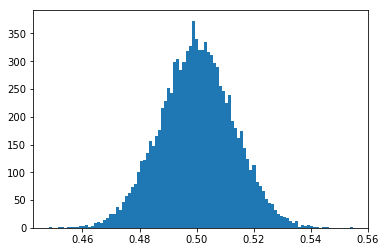

In [31]:
# Exercise 2 Solution

import random

def show_clt(n,m):
    means = np.empty(n)
    for i in range(n):
        sample = np.empty(m)
        for j in range(m):
            sample[j] = random.random()
        means[i] = np.mean(sample)
    
    # NumPy operations to standardize means
    # Uncomment to see the standard normal distribution
    # means -= mean(means)
    # means /= std(means)
        
    my_hist = plt.hist(means, bins=100)
    plt.show()
    
show_clt(10000,500)